In [5]:
# Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix


## Data Info

In [3]:
# Önce, data hakkında bilgi sahibi olacağız ve görselleştirme yapacağız.
df = pd.read_csv('data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [5]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

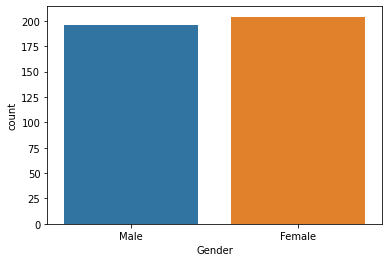

In [6]:
sns.countplot(x=df["Gender"])

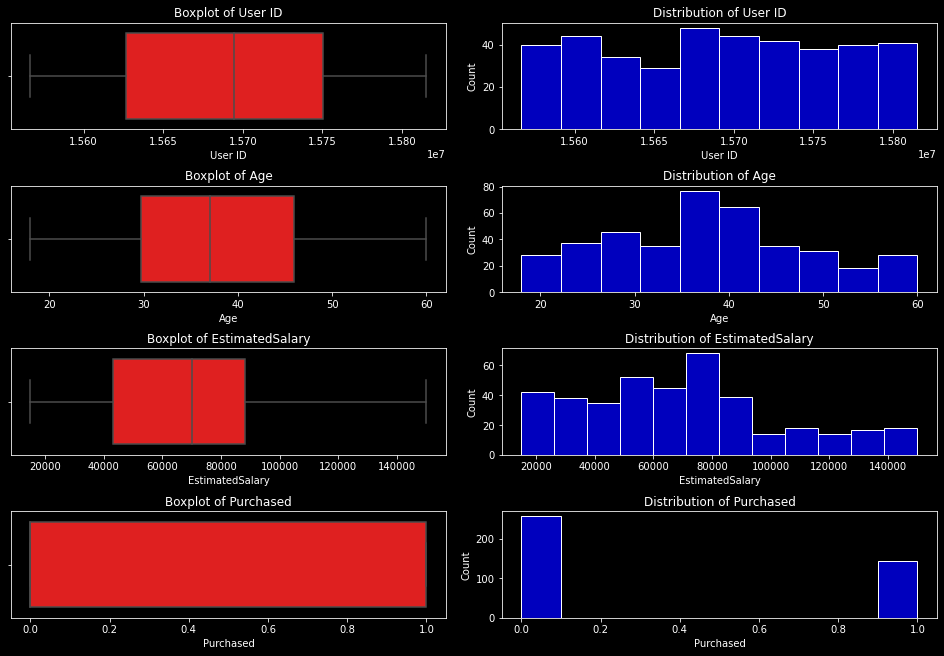

In [6]:
df_gozlem = df.select_dtypes(include=["float64","int64"])

f, axes = plt.subplots(len(df_gozlem.columns), 2, constrained_layout = True, figsize=([13,9]))

for i in range(len(df_gozlem.columns)):
    
    sns.boxplot(x=df_gozlem[df_gozlem.columns[i]], ax=axes[i,0], color="r")
    axes[i,0].set_title('Boxplot of '+df_gozlem.columns[i])
    sns.histplot(x=df_gozlem[df_gozlem.columns[i]], ax=axes[i,1], color="b")
    axes[i,1].set_title('Distribution of '+df_gozlem.columns[i])

<AxesSubplot:>

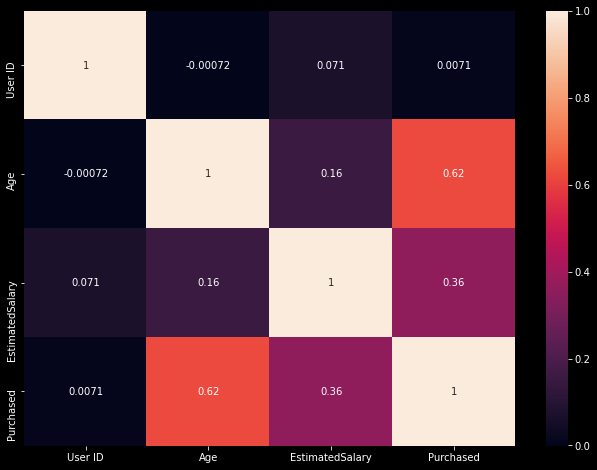

In [8]:
fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(df.corr(), annot=True)

## Data Preprocessing

In [9]:
df.drop(["User ID"], axis=1, inplace=True) #User ID işimize yaramadığı için çıkartacağız.

In [10]:
df['Gender'] = np.where(df['Gender'] == "Female", 0, 1) #Gender'ı sayısal veriye dönüştürüyoruz.

In [11]:
# Verimizi bağımlı ve bağımsız değişkenlere ayırıyoruz.
y = df["Purchased"]
X = df.drop('Purchased',axis = 1)

In [12]:
# Burada, modelimizin başarısını arttırmak için dönüşüm uyguluyoruz. StandarScaler, değişkenin kendi içindeki varyans yapısını,
# bilgi yapısını korur. Ancak belirli bir standarta oturtur.Değişken değerleri değişecektir ancak dağılım bilgisinin özünü koruyacaktır.

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
data_scaled = pd.DataFrame(scaled_data)
data_scaled.head()

,0,1,2
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751


## Train-Test Split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(scaled_data,y,test_size=0.20,random_state=42)

## Logistic Regression

In [14]:
log_model = LogisticRegression().fit(X_train,y_train)

## Model Evaluation

In [15]:
print(f'Test accuracy: {log_model.score(X_test,y_test)}')
print(f'Train accuracy: {log_model.score(X_train,y_train)}')

Test accuracy: 0.8875
Train accuracy: 0.815625


In [16]:
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



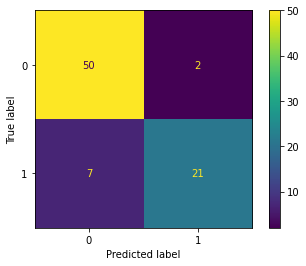

In [17]:
plot_confusion_matrix(log_model, X_test, y_test)